### TensorFLow Core and Algorithms  

This part will be a walkthrough to the core fundamental machine learning algorithms so shit na na discuss on Computing 2 and 1

The algorithms are :

- Linear Regression
- Classification
- Clusstering
- Hidden Markov Models

I'm not saying na eto lang gagamitin for your entire career pero these will be your starting building blocks 
wag kang tanga please

### Linear Regression


In [1]:
import matplotlib.pyplot as plt
import numpy as np


(0.0, 6.0, 0.0, 20.0)

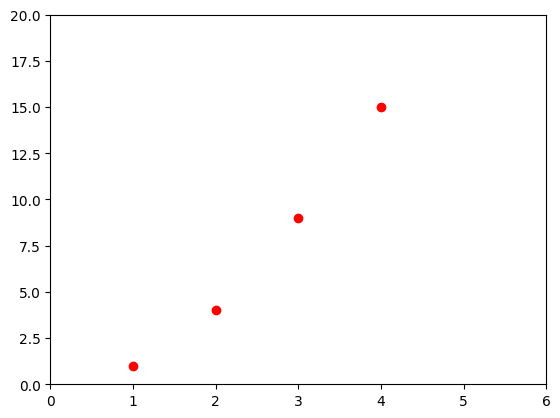

In [4]:
x = [1, 2, 3, 4]
y = [1, 4, 9, 15] 
plt.plot(x, y, 'ro') ## r represents as the color red and "o" represents that the plot points will be represented as circles
plt.axis([0, 6, 0, 20]) # limit


"Line of best fit refers to a line through a scatter plot of data points that best expresses the relationship between those points." (https://www.investopedia.com/terms/l/line-of-best-fit.asp)

Here's a refresher on the equation of a line in 2D.

$ y = mx + b $

Here's an example of a line of best fit for this graph.

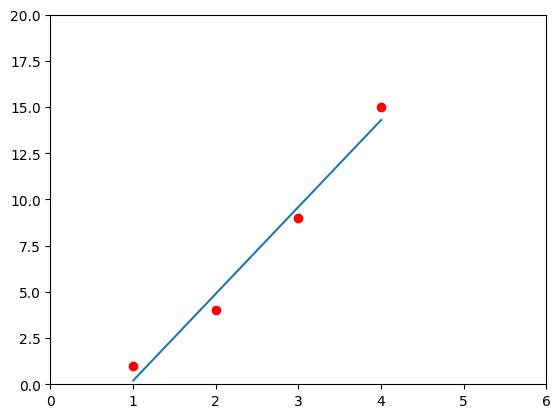

In [5]:
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

Once we've generated this line for our dataset, we can use its equation to predict future values. We just pass the features of the data point we would like to predict into the equation of the line and use the output as our prediction.

### Set up / Imports

In [9]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
# from six import urllib

import tensorflow._api.v2.feature_column as fc

import tensorflow as tf

### Data

In [13]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [14]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [15]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [16]:
dftrain.shape 

(627, 9)

627 entries and 9 features

In [17]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64